# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from nithiya_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "nithiya_output_data/cities.csv"

In [14]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Change back to 1500 after basic testing
lats = np.random.uniform(lat_range[0], lat_range[1], size=5)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

5

In [16]:
cities

['clyde river', 'sfantu gheorghe', 'cape town', 'dawlatabad', 'punta arenas']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URLx
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ab0436d4ad4aaccb31bc1903d6af96b9&units=metric&q=


In [18]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The longitude information received is: {lon}")
print(f"The humidity information received is: {humidity}")
print(f"The cloudiness information received is: {cloudiness}")
print(f"The wind speed information received is: {wind_speed}")

The latitude information received is: [70.4692, 45.8667, -33.9258, 36.4141, -53.15]
The temperature information received is: [-1.87, 10.03, 10.07, 33.25, 3.06]
The longitude information received is: [-68.5914, 25.7833, 18.4232, 64.9053, -70.9167]
The humidity information received is: [100, 90, 97, 11, 87]
The cloudiness information received is: [90, 100, 75, 0, 75]
The wind speed information received is: [1.54, 2.33, 0.45, 2.25, 7.2]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# create a data frame from cities, lat, and temp
city_dict = {
    "city": cities,
    "lat": lat,
    "long": lon,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}
city_data_df = pd.DataFrame(city_dict)
city_data_df

,city,lat,long,temp,humidity,cloudiness,wind speed
0,clyde river,70.4692,-68.5914,-1.87,100,90,1.54
1,sfantu gheorghe,45.8667,25.7833,10.03,90,100,2.33
2,cape town,-33.9258,18.4232,10.07,97,75,0.45
3,dawlatabad,36.4141,64.9053,33.25,11,0,2.25
4,punta arenas,-53.1500,-70.9167,3.06,87,75,7.20


In [20]:
# Output to csv file
city_data_df.to_csv("nithiya_output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Today's date: 2021-06-14


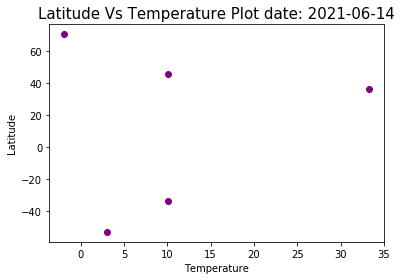

In [31]:
# Create a Scatter Plot for temperature vs latitude
from datetime import date

today = date.today()
print("Today's date:", today)
x_values = city_data_df['temp']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Temperature Plot date: {today}', 
          fontsize=15)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")

# plt.savefig("./nithiya_output_data/lat vs temp.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Humidity Plot

Today's date: 2021-06-14


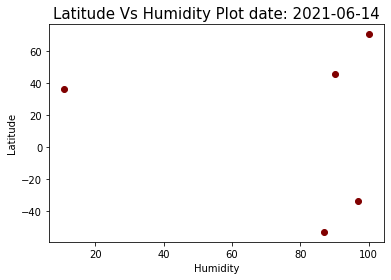

In [32]:
# Create a Scatter Plot for humidity vs latitude
from datetime import date

today = date.today()
print("Today's date:", today)
x_values = city_data_df['humidity']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='maroon')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Humidity Plot date: {today}', 
          fontsize=15)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("./nithiya_output_data/lat vs humidity.png", bbox_inches = "tight")

plt.show()

## Latitude vs. Cloudiness Plot

Today's date: 2021-06-14


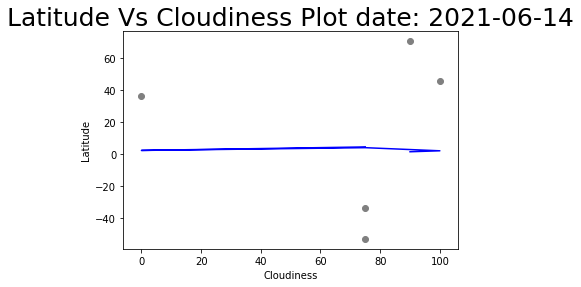

In [33]:
# Create a Scatter Plot for temperature vs latitude
from datetime import date

today = date.today()
print("Today's date:", today)
x_values = city_data_df['cloudiness']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, color="purple")
plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='grey')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Cloudiness Plot date: {today}', 
          fontsize=25)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("./nithiya_output_data/lat vs cloudiness.png", bbox_inches = "tight")

plt.show()

## Latitude vs. Wind Speed Plot

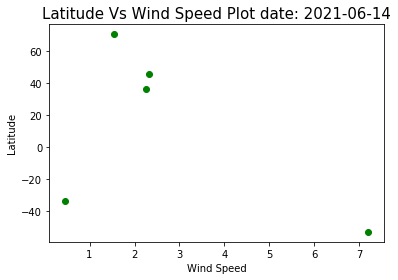

In [34]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['wind speed']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Wind Speed Plot date: {today}', 
          fontsize=15)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("./nithiya_output_data/lat vs wind speed.png", bbox_inches = "tight")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression